In [ ]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('clean_credit_score_classification.csv')

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN


# Exploratory Data Analysis

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  int64  
 1   Customer_ID               150000 non-null  int64  
 2   Month                     150000 non-null  int64  
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  float64
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  float64
 10  Num_Credit_Card           150000 non-null  float64
 11  Interest_Rate             150000 non-null  float64
 12  Num_of_Loan               150000 non-null  float64
 13  Type_of_Loan              150000 non-null  o

In [ ]:
shape=df.shape
print('The size of the dataset is',shape)

The size of the dataset is (150000, 28)


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [ ]:
#checking the null values
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

<AxesSubplot:>

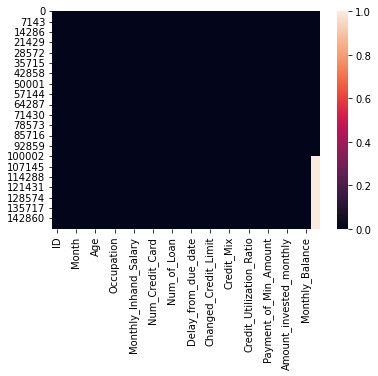

In [ ]:
#checking null values by using heatmap
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,150000.00000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05
mean,80633.500000,25982.66664,6.500000,33.479060,5.004617e+08,50505.123449,4192.525296,5.368707,5.533660,14.532080,...,21.070393,13.301967,10.46863,6.278940,1426.220376,32.283309,223.206580,113.126372,648.688135,-3.777778e+22
std,43301.414527,14340.51915,3.452064,10.767158,2.908262e+08,38299.358260,3182.728812,2.594388,2.068672,8.741316,...,14.813531,6.263060,6.60825,3.957925,1155.127101,5.113315,99.714003,144.283689,2081.547384,3.548415e+24
min,5634.000000,1006.00000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,-1.000000,0.000000,1.000000,...,-1.000000,-2.000000,0.50000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,-3.333333e+26
25%,43133.750000,13664.50000,3.750000,25.000000,2.451686e+08,19342.972500,1625.558333,3.000000,4.000000,7.000000,...,10.000000,9.000000,5.38000,3.000000,566.072500,28.054731,146.000000,29.916254,70.574798,2.677172e+02
50%,80633.500000,25777.00000,6.500000,33.000000,5.006886e+08,36999.705000,3091.000000,5.000000,5.000000,13.000000,...,18.000000,14.000000,9.40000,6.000000,1166.155000,32.297058,222.000000,67.946920,130.548923,3.339151e+02
75%,118133.250000,38385.00000,9.250000,42.000000,7.560027e+08,71683.470000,5951.373333,7.000000,7.000000,20.000000,...,28.000000,18.000000,14.83000,9.000000,1945.962500,36.487954,304.000000,152.294478,258.783441,4.634231e+02
max,155633.000000,50999.00000,12.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.000000,...,62.000000,25.000000,29.98000,17.000000,4998.070000,50.000000,408.000000,1779.103254,10000.000000,1.183931e+03


In [ ]:
#checking unique values for categorical columns and their value_counts and also the count of nan values if present in that column

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        count_nan_in_df = df[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_df))
        print('**********************************')
        print('\n')

Name:['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Jessicad              72
Langep                72
Stevex                72
Vaughanl              60
Ronald Groverk        60
                      ..
Breidthardtj          12
Sven Egenterx         12
Antonella Ciancioc    12
Valentina Zan         12
Nicks                 12
Name: Name, Length: 10128, dtype: int64
Count of NaN: 0
**********************************


Occupation:['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Scientist        10116
Accountant       10116
Developer        10080
Media_Manager    10080
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Na

In [ ]:
#hecking unique values for numericals columns and their value_counts and also the count of nan values if present
for column in df.columns:
    if df[column].dtype!=object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        count_nan_in_df = df[column].isnull().sum().sum()
        print ('Count of NaN: ' + str(count_nan_in_df))
        print('**********************************')
        print('\n')

ID:[  5634   5635   5636 ... 155631 155632 155633]
5634      1
5678      1
155626    1
155627    1
155628    1
         ..
80634     1
80635     1
80636     1
80637     1
155633    1
Name: ID, Length: 150000, dtype: int64
Count of NaN: 0
**********************************


Customer_ID:[ 3392  8625 11708 ... 44897 34304 37932]
3392     12
39924    12
23267    12
48794    12
18548    12
         ..
11956    12
30819    12
40329    12
49221    12
37932    12
Name: Customer_ID, Length: 12500, dtype: int64
Count of NaN: 0
**********************************


Month:[ 1  2  3  4  5  6  7  8  9 10 11 12]
1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
9     12500
10    12500
11    12500
12    12500
Name: Month, dtype: int64
Count of NaN: 0
**********************************


Age:[23. 28. 34. 54. 55. 21. 31. 33. 30. 24. 44. 45. 40. 41. 32. 35. 36. 39.
 37. 20. 46. 26. 42. 19. 48. 38. 43. 22. 16. 18. 15. 27. 25. 14. 17. 47.
 53. 56. 29. 49. 51. 5

In [ ]:
#splitting the data into two lists according to numerical and categorical features
Num=[]
Cat=[]

for i in df:
    if ((df[i].dtypes=='int64')|(df[i].dtypes=='float')):
        Num.append(i)
    else:
        Cat.append(i)

print(Num,end="")


['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

In [ ]:
print(Cat,end="")

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Data Visualization

In [ ]:
df.corr()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,1.000000,1.235872e-03,7.972174e-05,0.003467,1.170712e-02,-5.356989e-03,-0.004842,0.005192,-0.001475,3.956573e-03,...,-0.004153,0.002082,0.008678,-0.002539,2.941249e-03,-0.003354,-0.005601,-0.007432,0.005432,-0.001509
Customer_ID,0.001236,1.000000e+00,-2.317860e-15,-0.002148,5.769305e-03,1.076923e-02,0.010178,-0.001220,-0.004645,-4.712091e-03,...,0.004714,0.005215,0.000066,0.000124,4.381594e-03,-0.002292,-0.014817,0.022779,-0.002757,0.002542
Month,0.000080,-2.317860e-15,1.000000e+00,0.025947,3.331532e-15,-4.709694e-15,-0.002630,0.000064,0.000096,2.381373e-15,...,-0.000276,0.000321,-0.000786,0.208703,6.636281e-16,0.000901,0.034331,0.066029,-0.000662,-0.002268
Age,0.003467,-2.147711e-03,2.594667e-02,1.000000,-8.321883e-03,9.147472e-02,0.090402,-0.190328,-0.148354,-2.175556e-01,...,-0.173966,-0.184001,-0.157189,-0.240984,-2.024534e-01,0.028533,0.235043,-0.036316,0.007629,-0.003365
SSN,0.011707,5.769305e-03,3.331532e-15,-0.008322,1.000000e+00,-8.041949e-03,-0.008375,0.011615,-0.005044,4.774004e-03,...,0.010516,0.013302,0.019417,-0.007260,2.950511e-03,-0.000018,-0.003570,-0.004521,-0.003351,0.002832
Annual_Income,-0.005357,1.076923e-02,-4.709694e-15,0.091475,-8.041949e-03,1.000000e+00,0.998014,-0.284073,-0.217785,-3.023524e-01,...,-0.250064,-0.286120,-0.176220,-0.274569,-2.693193e-01,0.172570,0.272282,0.434815,0.054646,-0.003475
Monthly_Inhand_Salary,-0.004842,1.017783e-02,-2.629602e-03,0.090402,-8.374770e-03,9.980144e-01,1.000000,-0.283045,-0.216639,-3.016652e-01,...,-0.249270,-0.284999,-0.175963,-0.274182,-2.688573e-01,0.172664,0.271101,0.413670,0.054824,-0.003587
Num_Bank_Accounts,0.005192,-1.220125e-03,6.401716e-05,-0.190328,1.161475e-02,-2.840728e-01,-0.283045,1.000000,0.443114,5.841436e-01,...,0.560267,0.601188,0.333768,0.506109,5.068831e-01,-0.072187,-0.485030,0.033523,-0.015635,0.003686
Num_Credit_Card,-0.001475,-4.645267e-03,9.568968e-05,-0.148354,-5.044434e-03,-2.177854e-01,-0.216639,0.443114,1.000000,4.975443e-01,...,0.479713,0.422293,0.255355,0.448149,4.899456e-01,-0.055765,-0.416751,0.043827,-0.010715,0.001233
Interest_Rate,0.003957,-4.712091e-03,2.381373e-15,-0.217556,4.774004e-03,-3.023524e-01,-0.301665,0.584144,0.497544,1.000000e+00,...,0.589252,0.570997,0.370558,0.617943,6.294144e-01,-0.073693,-0.576042,0.052274,-0.013153,0.003156


<AxesSubplot:>

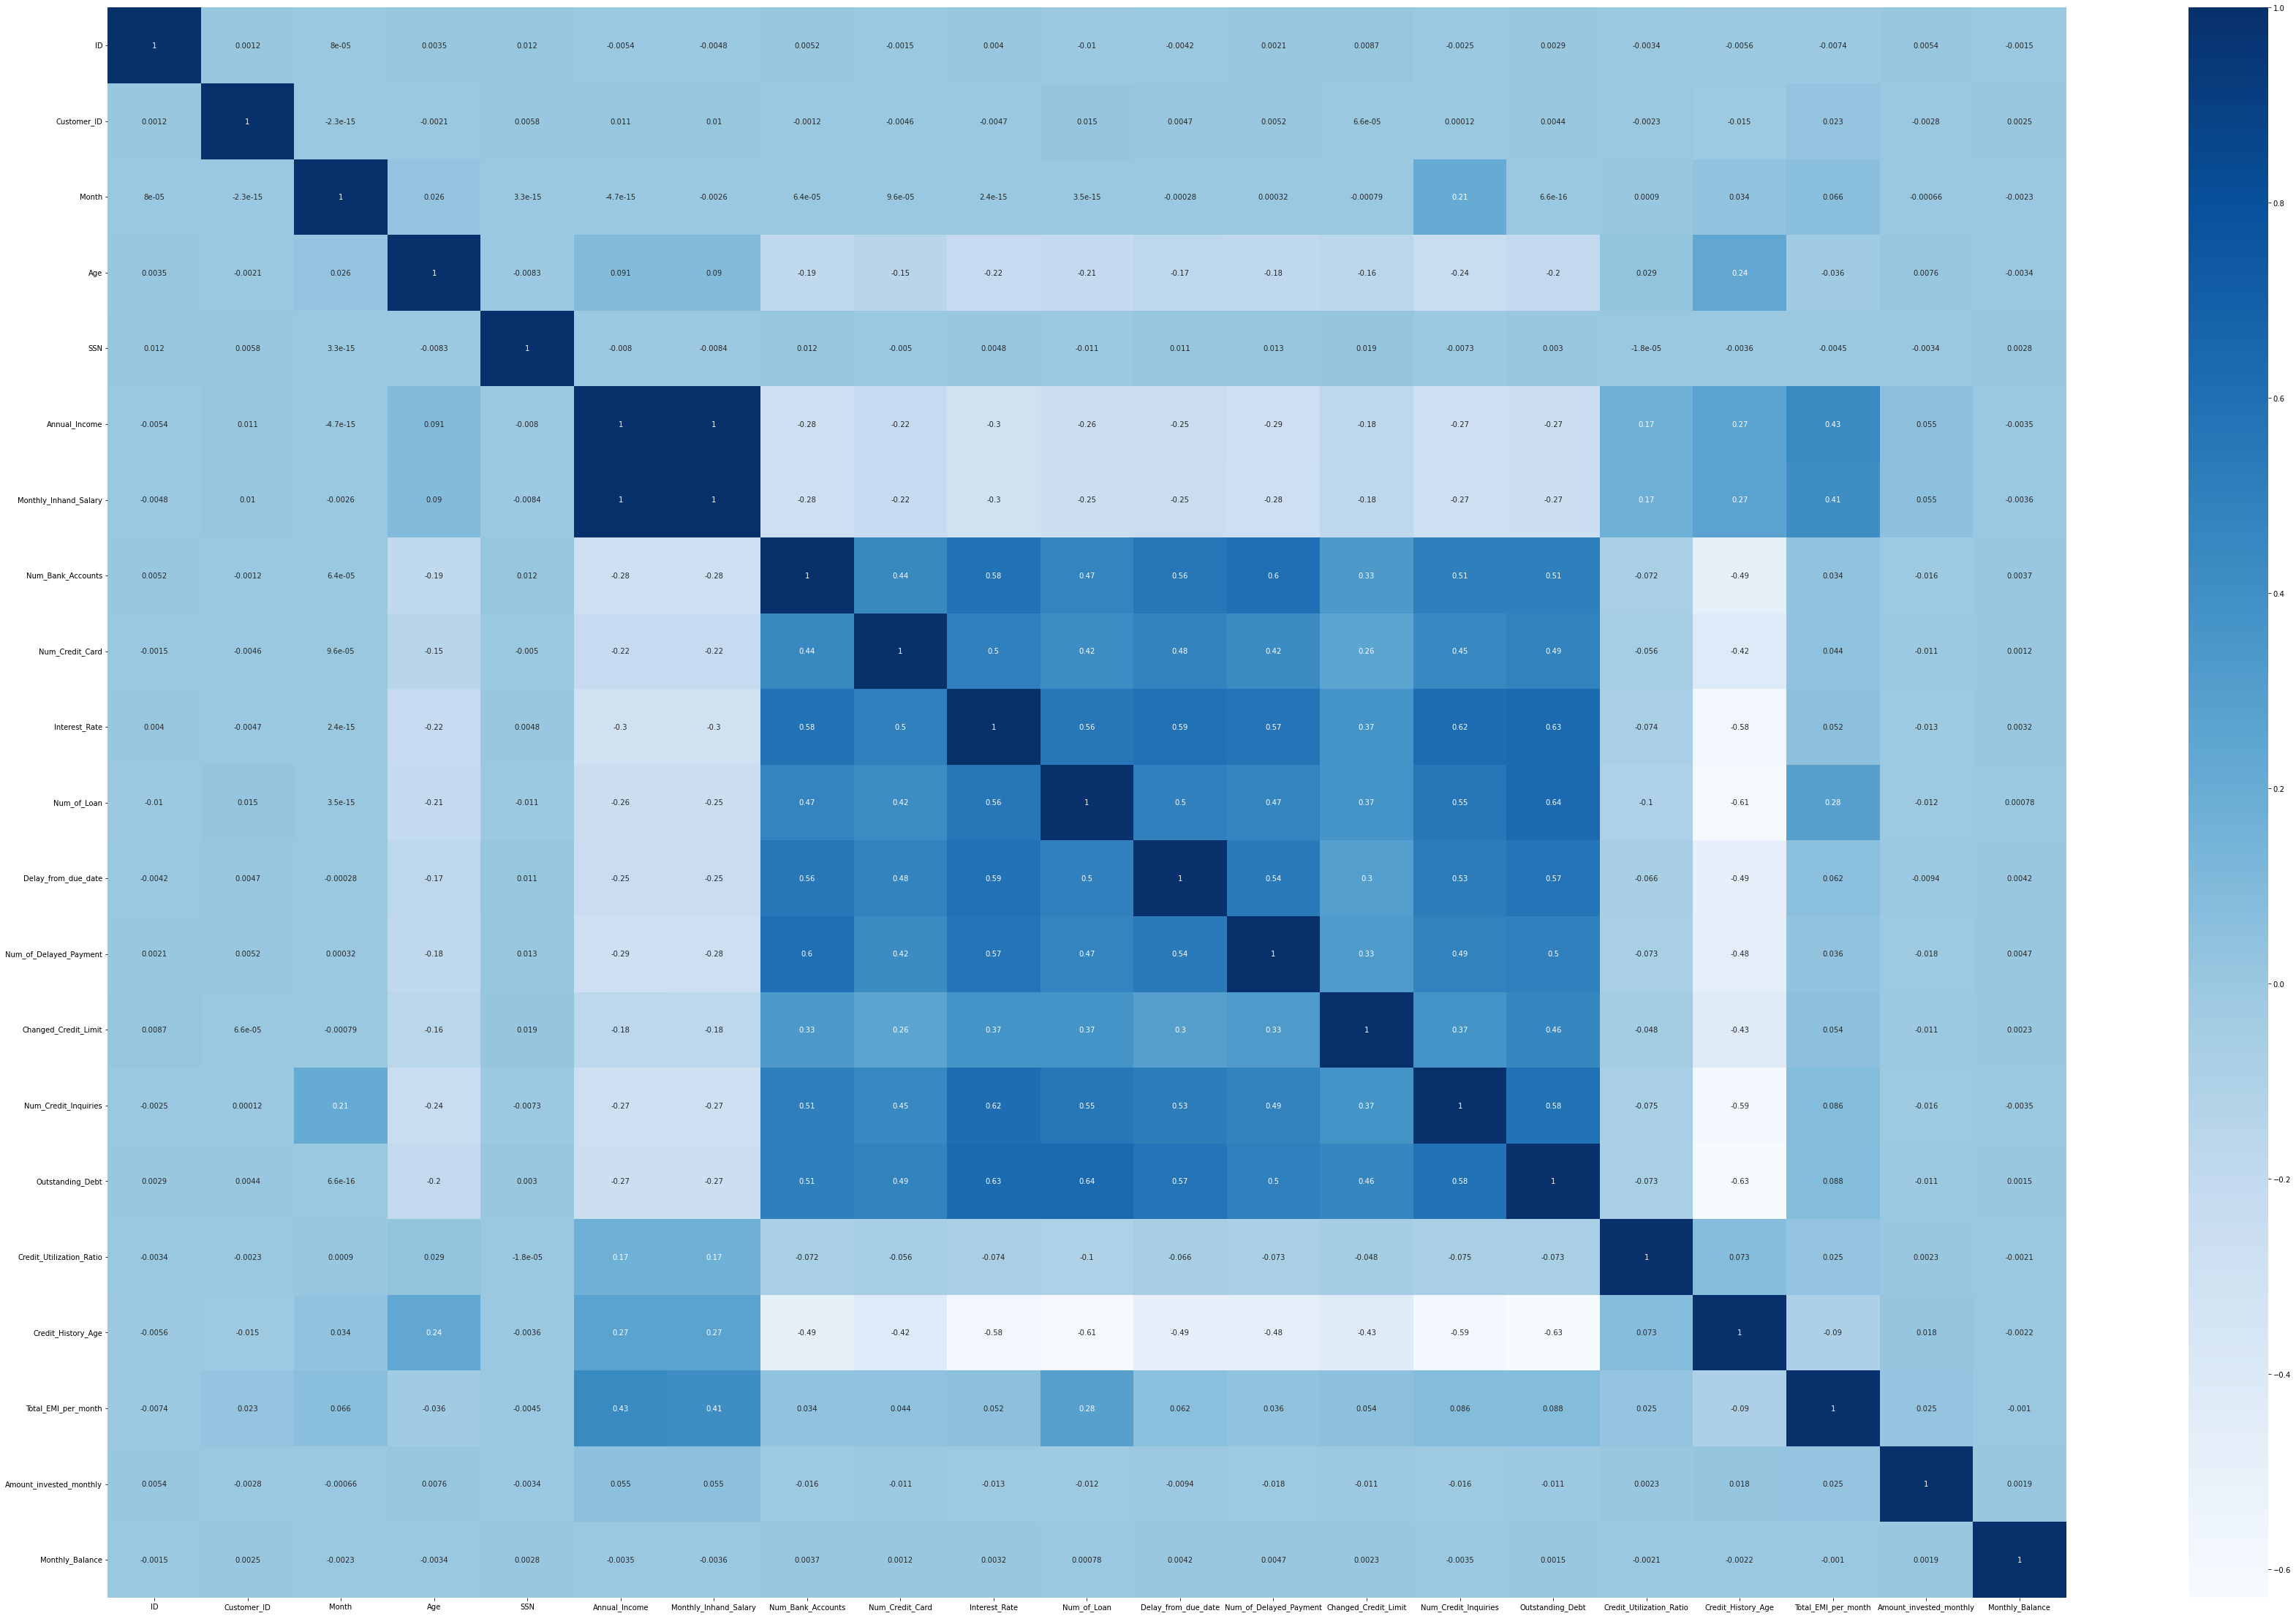

In [ ]:
#corrleation amings each row and columns and showing the heatmap of the correlation and the value, darker the blue colour more correlation of the column to the row.
plt.figure(figsize=(60,40))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

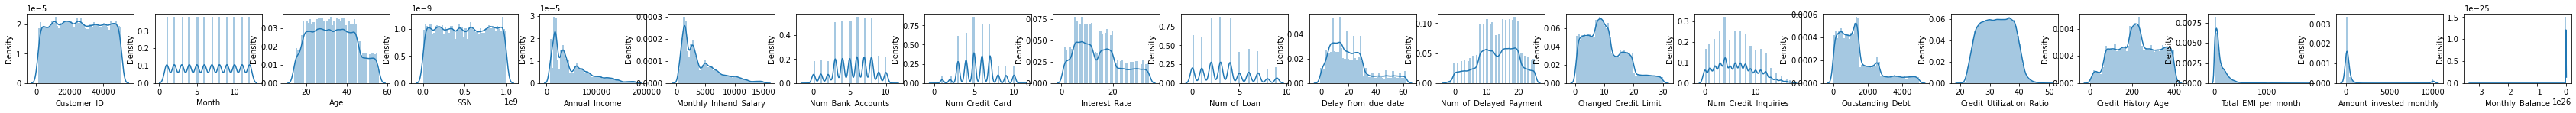

In [ ]:
#distribution plot of numerical list

plt.figure(figsize=(150,100))
for i in range(1,len(Num)):
    plt.subplot(50,50,i+1)
    sns.distplot(df[Num[i]])

In [ ]:
print("Length of Numerical features", len(Num))
print("Length of categorical features",len(Cat))

Length of Numerical features 21
Length of categorical features 7


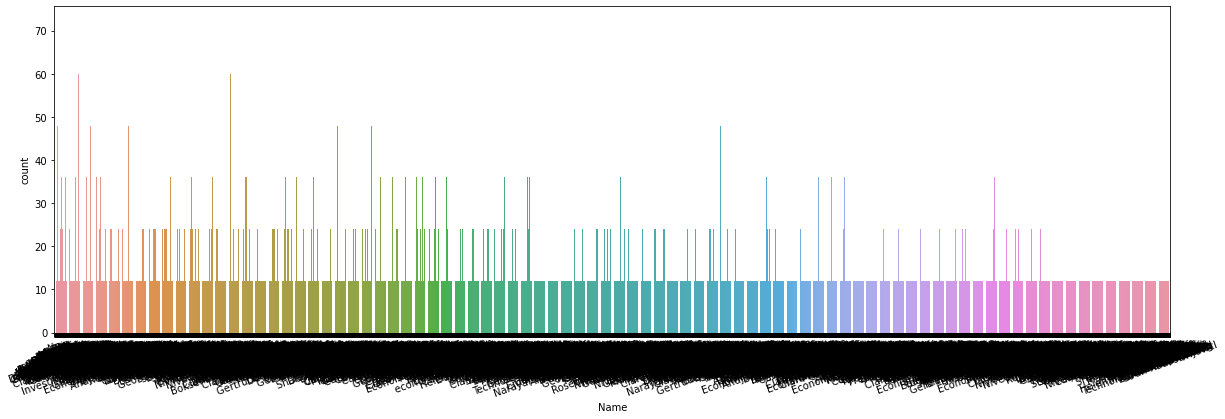

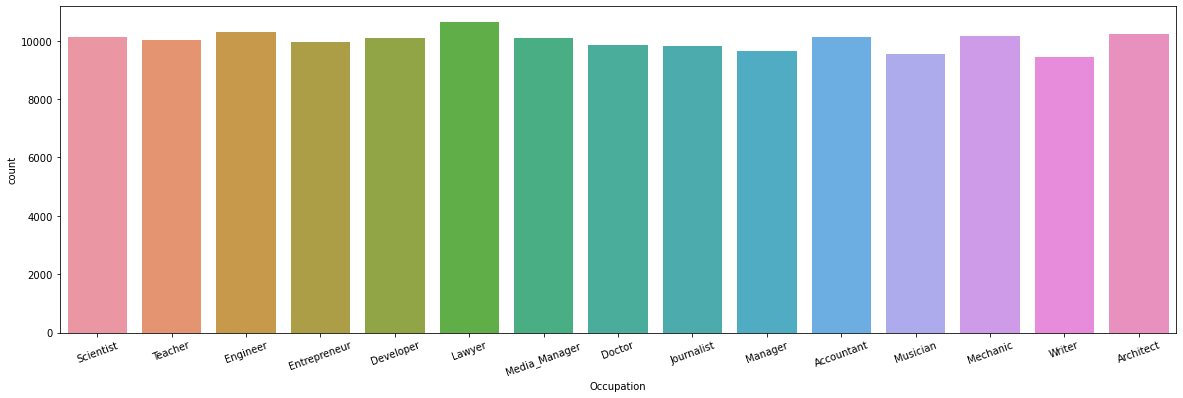

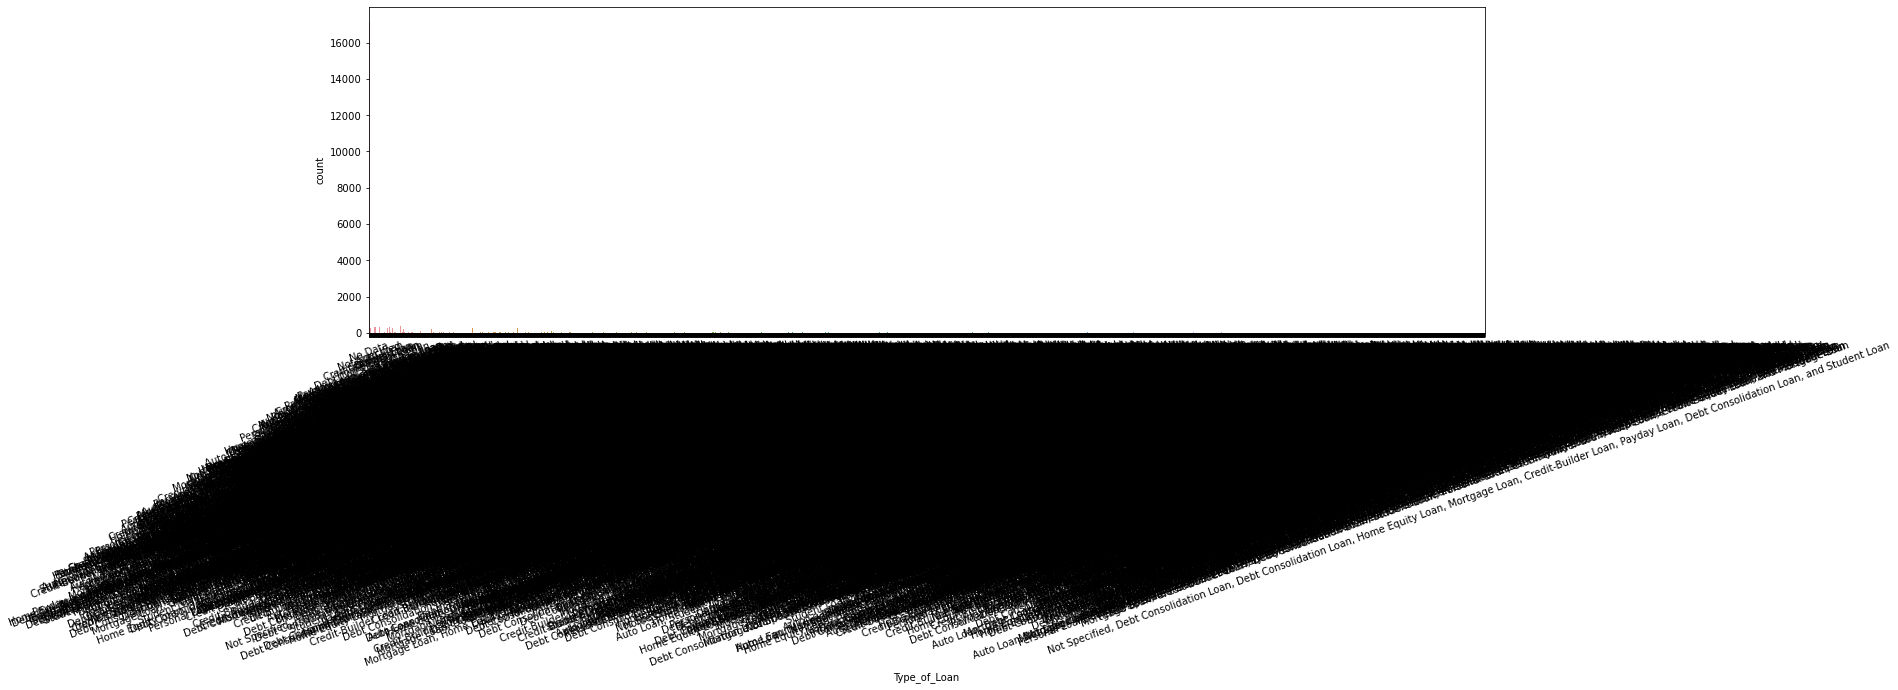

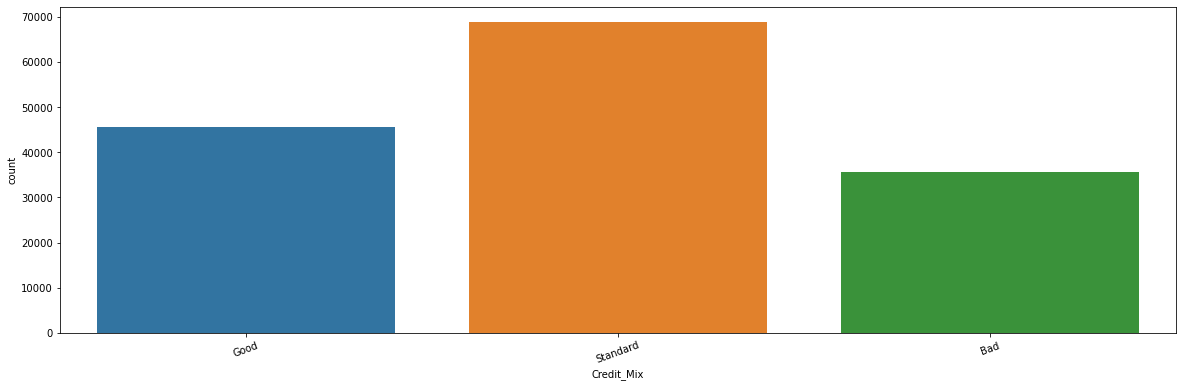

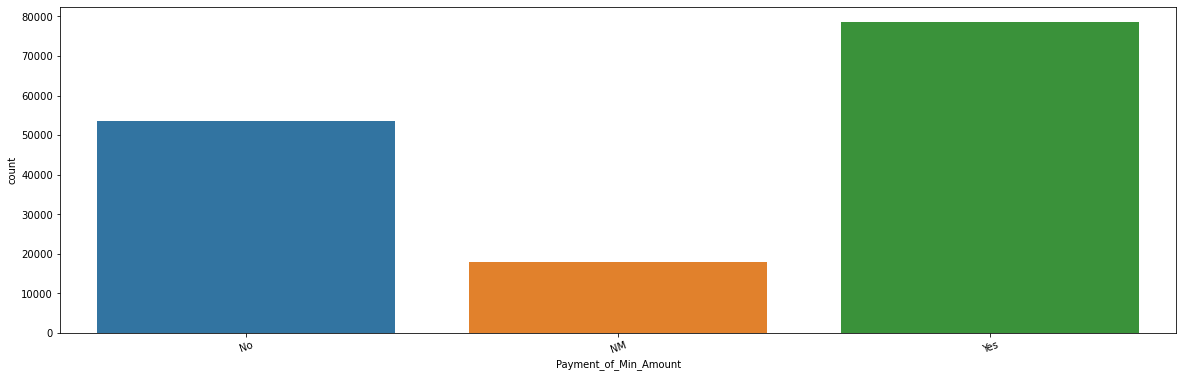

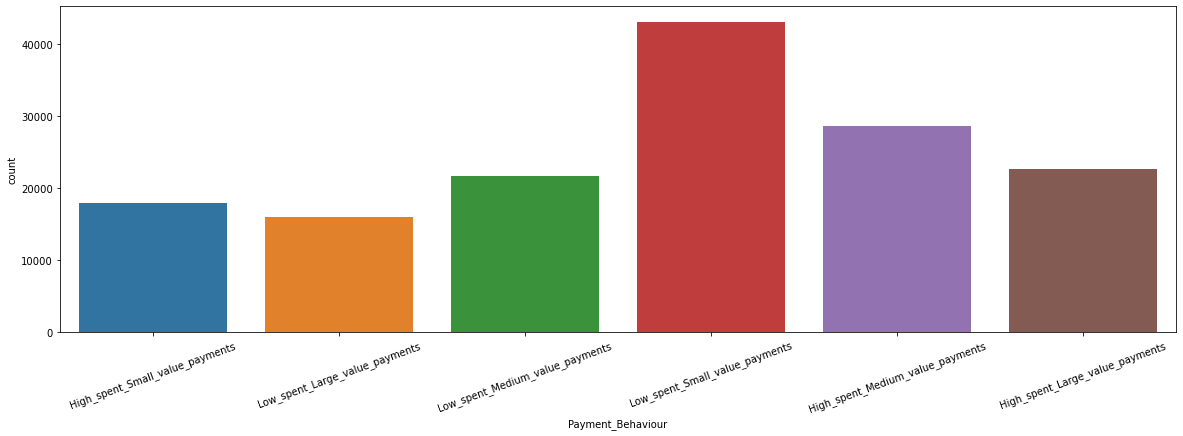

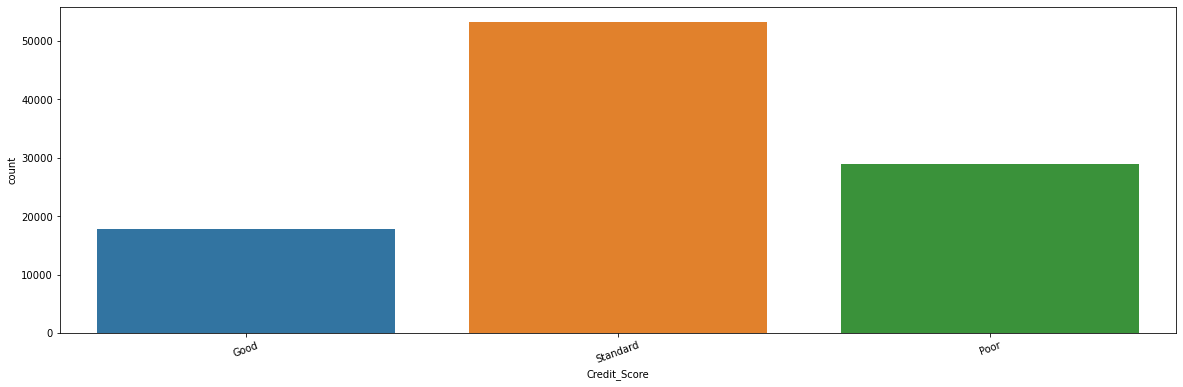

In [ ]:
#value count for the categorical data
for i in Cat:
    plt.figure(figsize=(20,6))
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=20)
    plt.show()

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,10000.000000,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,NaN


In [ ]:
Cat

['Name',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['6 How many times you have made an online purchase in the past 1 year?']=le.fit_transform(df['6 How many times you have made an online purchase in the past 1 year?'].astype(str))

In [ ]:
df1=df.copy()

In [ ]:
df1.head(100)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5773,49323,8,Soyoungd,33.0,342902649.0,Engineer,88640.24,7266.686667,3.0,...,Good,950.36,30.870799,312.0,No,135.173371,98.441951,High_spent_Large_value_payments,733.053344,Good
96,5778,15941,1,Harriet McLeodd,35.0,414532918.0,Entrepreneur,54392.16,4766.680000,6.0,...,Standard,179.22,25.649246,322.0,Yes,124.392082,243.735437,Low_spent_Large_value_payments,378.540480,Standard
97,5779,15941,2,Harriet McLeodd,35.0,414532918.0,Entrepreneur,54392.16,4766.680000,6.0,...,Standard,179.22,29.408775,323.0,Yes,124.392082,142.751864,High_spent_Medium_value_payments,459.524053,Standard
98,5780,15941,3,Harriet McLeodd,35.0,414532918.0,Entrepreneur,54392.16,4766.680000,6.0,...,Standard,179.22,31.258928,324.0,NM,124.392082,33.349569,High_spent_Large_value_payments,558.926349,Standard


In [ ]:
logistic, knn,decision trees